In [1]:
!pip install dfencoder


In [6]:
#these are our libraries
from dfencoder import AutoEncoder
import numpy as np
import pandas as pd
import torch

#and, for pretty visualiations...
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%config InlineBackend.figure_format = 'retina'

In [20]:
df = pd.read_csv("C:/Users/mmrha/Desktop/cmu/Independent study/python/winemin.csv", encoding = "UTF-8")


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,6.2,0.450,0.26,4.4,0.063,63.0,206.0,0.9940,3.27,0.52,9.8
1,9.8,0.360,0.46,10.5,0.038,4.0,83.0,0.9956,2.89,0.30,10.1
2,5.5,0.485,0.00,1.5,0.065,8.0,103.0,0.9940,3.63,0.40,9.7
3,6.4,0.595,0.14,5.2,0.058,15.0,97.0,0.9951,3.38,0.36,9.0
4,7.6,0.480,0.37,0.8,0.037,4.0,100.0,0.9902,3.03,0.39,11.4


In [27]:
train = df.sample(frac=.8, random_state=42)
test = df.loc[~df.index.isin(train.index)]

X_train = train
X_val = test

In [22]:
model = AutoEncoder(
    encoder_layers = [512, 512, 512], #model architecture
    decoder_layers = [], #decoder optional - you can create bottlenecks if you like
    activation='relu',
    swap_p=0.2, #noise parameter
    lr = 0.01,
    lr_decay=.99,
    batch_size=512,
    logger='ipynb', #special logging for jupyter notebooks
    verbose=True,
    optimizer='sgd',
    scaler='gauss_rank', #gauss rank scaling forces your numeric features into standard normal distributions
    min_cats=3 #Define cutoff for minority categories, default 10
)

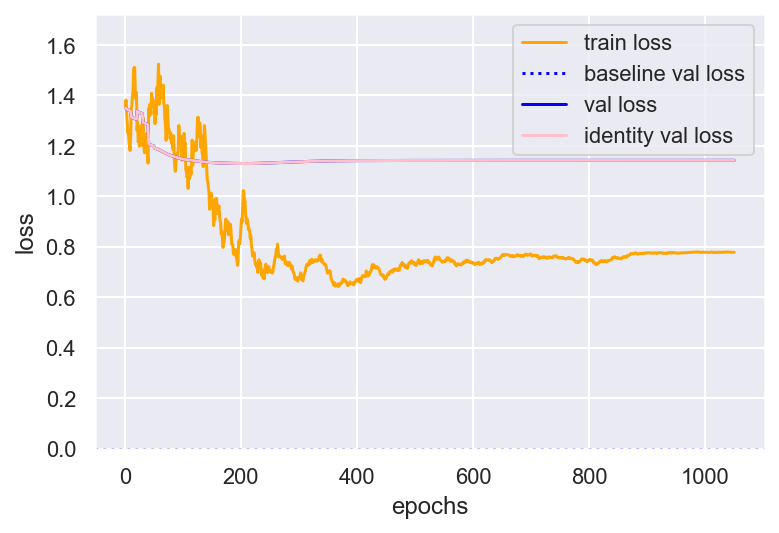


net validation loss, swapped input: 
1.142699956893921 

baseline validation loss: 0.0 

net validation loss, unaltered input: 
1.142699956893921 





In [43]:
model.fit(X_train, epochs=1000,val=X_val)

In [57]:
data=[df,df,df,df,df,df,df,df,df,df]
result = pd.concat(data)
result

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,6.2,0.450,0.26,4.40,0.063,63.0,206.0,0.99400,3.27,0.52,9.8
1,9.8,0.360,0.46,10.50,0.038,4.0,83.0,0.99560,2.89,0.30,10.1
2,5.5,0.485,0.00,1.50,0.065,8.0,103.0,0.99400,3.63,0.40,9.7
3,6.4,0.595,0.14,5.20,0.058,15.0,97.0,0.99510,3.38,0.36,9.0
4,7.6,0.480,0.37,0.80,0.037,4.0,100.0,0.99020,3.03,0.39,11.4
...,...,...,...,...,...,...,...,...,...,...,...
178,7.1,0.240,0.34,1.20,0.045,6.0,132.0,0.99132,3.16,0.46,11.2
179,6.0,0.590,0.00,0.80,0.037,30.0,95.0,0.99032,3.10,0.40,10.9
180,6.0,0.350,0.46,0.90,0.033,9.0,65.0,0.98934,3.24,0.35,12.1
181,5.2,0.405,0.15,1.45,0.038,10.0,44.0,0.99125,3.52,0.40,11.6


In [58]:
imputed_values = model.df_predict(result)

In [59]:
imputed_values

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,6.9,0.310000,0.253566,4.255733,0.049000,25.843088,124.000000,0.993700,3.140000,0.470000,9.800000
1,6.9,0.310000,0.240000,4.600000,0.048000,20.000000,118.122841,0.993700,3.110000,0.460000,9.989620
2,6.8,0.300000,0.140000,5.600000,0.051000,27.628277,124.000000,0.993126,3.110000,0.460000,9.700000
3,6.9,0.310490,0.240000,4.445316,0.049213,24.000000,119.000000,0.993689,3.140000,0.460000,9.800000
4,6.9,0.310000,0.253086,3.885825,0.048173,20.000000,117.737015,0.993601,3.136209,0.460000,10.000000
...,...,...,...,...,...,...,...,...,...,...,...
178,6.9,0.310000,0.270392,3.588183,0.048000,20.000000,119.236931,0.993720,3.150000,0.465126,10.000000
179,6.8,0.293835,0.140000,5.367840,0.050000,28.000000,119.000000,0.993039,3.100000,0.460000,9.700000
180,6.8,0.310000,0.263090,4.266119,0.048000,23.000000,117.000000,0.993295,3.150000,0.460000,9.990368
181,6.8,0.310000,0.240000,4.600000,0.049000,23.932680,118.686882,0.993206,3.149240,0.460000,9.900000


In [60]:
imputed_values.to_csv("C:/Users/mmrha/Desktop/cmu/Independent study/python/autowine.csv")